In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ailabtools.statistic as st
from ailabtools.keras.pairgenerator import PairDataGenerator

import keras
from keras.applications.mobilenetv2 import MobileNetV2
from keras.layers import Dense, Activation, GlobalAveragePooling2D
from keras.models import Model

/home/cpu11128-local/.virtualenvs/AIlab/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Raw data dict sum: 2689


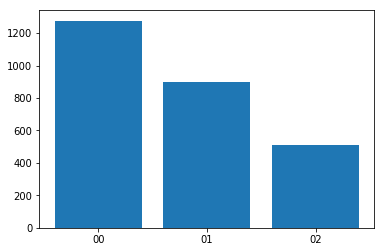

[1276, 901, 512]
(3, 'min:', 512, 'max:', 1276, 'std:', 311.91914906840134, 'mean:', 896.3333333333334, 'median:', 901.0)


In [2]:
data_path = '/media/cpu11128-local/Database/data_test_11_face_size/val'
xs, ys = st.get_raw_data(data_path)
_,_,_  = st.statistic_data(xs, ys, title='Raw data dict')

Sample Train sum: 2149


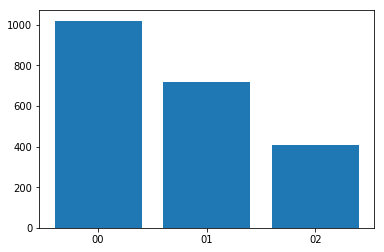

[1020, 720, 409]
(3, 'min:', 409, 'max:', 1020, 'std:', 249.45317975301273, 'mean:', 716.3333333333334, 'median:', 720.0)
Sample Val sum: 540


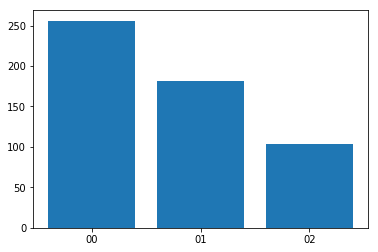

[256, 181, 103]
(3, 'min:', 103, 'max:', 256, 'std:', 62.465990746965666, 'mean:', 180.0, 'median:', 181.0)


In [3]:
xs_train, ys_train, xs_val, ys_val = st.split_data(xs, ys, alpha=0.8)
data_dic_train, keys_train, nums_train = st.statistic_data(xs_train, ys_train, title='Sample Train')
data_dic_val, keys_val, nums_val = st.statistic_data(xs_val, ys_val, title='Sample Val')

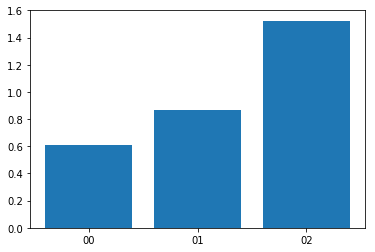

In [4]:
weights_dict = st.get_weight_dict(xs_train, ys_train, multiply=3)
ks = list(weights_dict.keys())
plt.bar(ks, [weights_dict[k] for k in ks])
plt.show()

weights_dict_int = {}
for k in weights_dict:
    weights_dict_int[int(k)] = weights_dict[k]

In [5]:
train_gen = PairDataGenerator(rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)
val_gen = PairDataGenerator()

In [6]:
input_shape = (224, 224, 3)
base = MobileNetV2(input_shape=input_shape, include_top=False)
x = base.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = Dense(3)(x)
x = Activation('softmax')(x)
model = Model(base.inputs, x)

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit_generator(train_gen.flow_from_pair(xs_train, ys_train, batch_size=16, target_size=input_shape[:2]),
                    validation_data=val_gen.flow_from_pair(xs_val, ys_val, batch_size=16, target_size=input_shape[:2]),
                    epochs = 10, 
                    class_weight=weights_dict_int, 
                    workers=4, 
                    use_multiprocessing=True)

Found 2149 images belonging to 3 classes.
Found 540 images belonging to 3 classes.
Epoch 1/10
  4/135 [..............................] - ETA: 14:49 - loss: 1.0471

Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-2:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/proces